---
**BIODATA DIRI**

- Nama : Asfa Lazuardi Wicaksono
- Universitas : Airlangga
- Jurusan : Teknologi Sains Data
- Semester : 5
- Email : asfa.lazuardi@gmail.com
- Github : https://github.com/Asfa23
- Linkedin : https://www.linkedin.com/in/asfa-lazuardi-wicaksono/
- Instagram : https://www.instagram.com/asfalzr/

---

# **READ DATA CSV**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# URL keempat file CSV
url_customer = "https://raw.githubusercontent.com/Asfa23/Kalbe_Virtual_Internship/main/Case%20Study%20-%20Customer.csv"
url_product = "https://raw.githubusercontent.com/Asfa23/Kalbe_Virtual_Internship/main/Case%20Study%20-%20Product.csv"
url_store = "https://raw.githubusercontent.com/Asfa23/Kalbe_Virtual_Internship/main/Case%20Study%20-%20Store.csv"
url_transaction = "https://raw.githubusercontent.com/Asfa23/Kalbe_Virtual_Internship/main/Case%20Study%20-%20Transaction.csv"

# Baca data dari CSV
df_customer = pd.read_csv(url_customer, sep=";")
df_product = pd.read_csv(url_product, sep=";")
df_store = pd.read_csv(url_store, sep=";")
df_transaction = pd.read_csv(url_transaction, sep=";")

# Cetak tabel-tabel DataFrame
print("Data Customer:")
print(df_customer)

print("\nData Product:")
print(df_product)

print("\nData Store:")
print(df_store)

print("\nData Transaction:")
print(df_transaction)

Data Customer:
     CustomerID  Age  Gender Marital Status Income
0             1   55       1        Married   5,12
1             2   60       1        Married   6,23
2             3   32       1        Married   9,17
3             4   31       1        Married   4,87
4             5   58       1        Married   3,57
..          ...  ...     ...            ...    ...
442         443   33       1            NaN   9,28
443         444   53       0        Married  15,31
444         445   51       0        Married  14,48
445         446   57       0        Married   7,81
446         447   54       1        Married  20,37

[447 rows x 5 columns]

Data Product:
  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
5        P6         Cashew  18000
6        P7   Coffee Candy   9400
7        P8            Oat  16000
8        P9        Yoghurt  

# **DATA CLEANING**

### **1. Mengatasi Missing Value**

### Missing Value CUSTOMER

In [ ]:
#ngecek missing value CUSTOMER
hitung_missing_value = df_customer.isnull().sum()
print(hitung_missing_value)

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64


karena hanya terdapat 3 missing value dari 447 data pada kolom Marital Status, maka saya memutuskan untuk menghapus 3 data tersebut karena kemungkinan tidak akan berpengaruh besar terhadap modelnya

In [ ]:
# Hapus baris dengan missing value pada kolom "Marital Status"
df_customer.dropna(subset=["Marital Status"], inplace=True)

# Cetak tabel df_customer setelah penghapusan missing value
hitung_missing_value = df_customer.isnull().sum()
print(hitung_missing_value)

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64


### Missing Value PRODUCT

In [ ]:
#ngecek missing value PRODUCT
hitung_missing_value = df_product.isnull().sum()
print(hitung_missing_value)

ProductID       0
Product Name    0
Price           0
dtype: int64


### Missing Value STORE

In [ ]:
#ngecek missing value STORE
hitung_missing_value = df_store.isnull().sum()
print(hitung_missing_value)

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64


### Missing Value TRANSACTION

In [ ]:
#ngecek missing value TRANSACTION
hitung_missing_value = df_transaction.isnull().sum()
print(hitung_missing_value)

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


## **2. Cek Duplikasi Data**

In [ ]:
# Cek duplikasi pada masing-masing DataFrame
dup_customer = df_customer[df_customer.duplicated()]
dup_product = df_product[df_product.duplicated()]
dup_store = df_store[df_store.duplicated()]
dup_transaction = df_transaction[df_transaction.duplicated()]

# Cetak hasil cek duplikasi
print("Duplikasi pada Data Customer:")
print(dup_customer)

print("\nDuplikasi pada Data Product:")
print(dup_product)

print("\nDuplikasi pada Data Store:")
print(dup_store)

print("\nDuplikasi pada Data Transaction:")
print(dup_transaction)

Duplikasi pada Data Customer:
Empty DataFrame
Columns: [CustomerID, Age, Gender, Marital Status, Income]
Index: []

Duplikasi pada Data Product:
Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []

Duplikasi pada Data Store:
Empty DataFrame
Columns: [StoreID, StoreName, GroupStore, Type, Latitude, Longitude]
Index: []

Duplikasi pada Data Transaction:
Empty DataFrame
Columns: [TransactionID, CustomerID, Date, ProductID, Price, Qty, TotalAmount, StoreID]
Index: []


Pada tahap cek duplikasi data, dilakukan pemeriksaan untuk memverifikasi apakah terdapat baris data yang duplikat dalam setiap tabel data. Hasil dari pengecekan menunjukkan bahwa tidak ada duplikasi data dalam setiap tabel, seperti tidak ada CustomerID, ProductID, StoreID, atau TransactionID yang sama di antara baris-baris data. Hal ini menandakan bahwa data pada masing-masing tabel telah terbebas dari duplikasi berdasarkan kolom kunci utamanya.

# **MERGED DATA CSV**

In [ ]:
# Gabungkan data menggunakan metode merge
df_combined = pd.merge(df_transaction, df_customer, on="CustomerID", how="left")
df_combined = pd.merge(df_combined, df_product, on="ProductID", how="left")
df_combined = pd.merge(df_combined, df_store, on="StoreID", how="left")

df_combined
# Menyimpan data yang telah digabungkan ke dalam file CSV baru
# df_combined.to_csv("combined_data.csv", index=False)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36.0,0.0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44.0,1.0,Married,"14,58",Yoghurt,10000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27.0,1.0,Single,"0,18",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48.0,1.0,Married,"12,57",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33.0,0.0,Married,"6,95",Yoghurt,10000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,38.0,0.0,Married,"3,34",Cheese Stick,15000,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,29.0,0.0,Married,"4,74",Ginger Candy,3200,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,37.0,0.0,Married,"3,73",Coffee Candy,9400,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,47.0,0.0,Married,"13,6",Oat,16000,Buana,Buana,General Trade,"-1,26916","116,825264"


In [ ]:
# Menghapus kolom "Price_y" jika ada
if "Price_y" in df_combined.columns:
    df_combined.drop("Price_y", axis=1, inplace=True)

# Mengubah nama kolom "Price_x" menjadi "Price"
df_combined.rename(columns={"Price_x": "Price"}, inplace=True)
df_combined

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36.0,0.0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44.0,1.0,Married,"14,58",Yoghurt,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27.0,1.0,Single,"0,18",Choco Bar,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48.0,1.0,Married,"12,57",Choco Bar,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33.0,0.0,Married,"6,95",Yoghurt,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,38.0,0.0,Married,"3,34",Cheese Stick,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,29.0,0.0,Married,"4,74",Ginger Candy,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,37.0,0.0,Married,"3,73",Coffee Candy,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,47.0,0.0,Married,"13,6",Oat,Buana,Buana,General Trade,"-1,26916","116,825264"


Secara singkat, terpadat 5020 baris dan 18 kolom setelah digabungkan


---
# **MEMBUAT CLUSTERING**

---

Judul : **Segmentasi Pelanggan berdasarkan Pembelian**

- Disini, saya akan melakukan clustering pelanggan berdasarkan data pembelian yang mereka lakukan, seperti total pembelian, jumlah produk yang dibeli, atau frekuensi pembelian. Tujuan dari clustering ini untuk mengidentifikasi kelompok pelanggan yang berbeda berdasarkan pola pembelian mereka.

## **1. Membuat dataframe terpisah**

In [ ]:
# Memilih fitur-fitur yang relevan untuk klastering pelanggan
df_customer_purchase = df_combined.groupby("CustomerID").agg({
    "Price": ["sum", "count"],  # Total pembelian dan jumlah produk yang dibeli
    "Date": "nunique"  # Frekuensi pembelian (jumlah unik tanggal transaksi)
}).reset_index()
df_customer_purchase

CustomerID   Price          Date
                   sum count nunique
0            1  201000    17      17
1            2   91200    13      13
2            3  125800    15      15
3            4   64900    10      10
4            5   73400     7       7
..         ...     ...   ...     ...
442        443  145100    16      15
443        444  201300    18      18
444        445  169800    18      18
445        446  113700    11      11
446        447  155300    13      12

[447 rows x 4 columns]

In [ ]:
# Memberikan nama baru untuk kolom hasil klastering
df_customer_purchase.columns = ["CustomerID", "TotalPurchase", "TotalProducts", "Frequency"]
df_customer_purchase

,CustomerID,TotalPurchase,TotalProducts,Frequency
0,1,201000,17,17
1,2,91200,13,13
2,3,125800,15,15
3,4,64900,10,10
4,5,73400,7,7
...,...,...,...,...
442,443,145100,16,15
443,444,201300,18,18
444,445,169800,18,18
445,446,113700,11,11


## **2. Standarisasi Data (Z-score)**

In [ ]:
# Standarisasi data (z-score normalization)
scaler = StandardScaler()
df_customer_purchase_scaled = scaler.fit_transform(df_customer_purchase[["TotalPurchase", "TotalProducts", "Frequency"]])

Pada kode tersebut, dilakukan standarisasi data dengan menggunakan metode z-score normalization.
- Standarisasi data ini bertujuan untuk mengubah nilai dari tiga variabel yaitu "TotalPurchase", "TotalProducts", dan "Frequency" dalam DataFrame "df_customer_purchase" menjadi nilai-nilai yang memiliki skala yang sama dan distribusi yang lebih terpusat di sekitar nilai rata-rata nol dengan standar deviasi satu.
- Proses ini berguna dalam analisis data dan pemodelan untuk memastikan variabel-variabel tersebut memiliki pengaruh yang setara tanpa mendistorsi hasil analisis oleh perbedaan skala dan spesifikasi dari setiap variabel tersebut.

## **3. Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

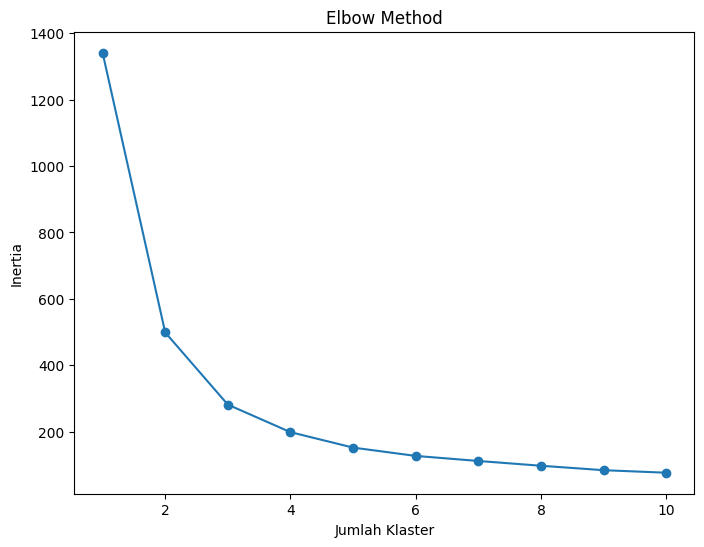

In [ ]:
# Melakukan Elbow Method untuk menentukan jumlah klaster yang optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customer_purchase_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Dengan menggunakan elbow method pada nilai n = 2, kita melihat bahwa nilai inertia menunjukkan penurunan yang signifikan sebelum mencapai titik siku pada grafik. Pada nilai n = 2, inertia mencapai patahannya yang paling besar, dan penurunan inertia menjadi lebih landai setelahnya. Oleh karena itu, untuk langkah selanjutnya dalam analisis klastering, kita memilih untuk menggunakan jumlah klaster sebanyak 2, karena nilai n tersebut memberikan hasil yang optimal dan paling sesuai dengan struktur data yang ada.

## **4. Mengambil n = 2**

In [ ]:
# Melakukan klastering pelanggan menggunakan jumlah klaster yang dipilih
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_customer_purchase["Cluster"] = kmeans.fit_predict(df_customer_purchase_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **5. Visualisasi Scatter Plot**

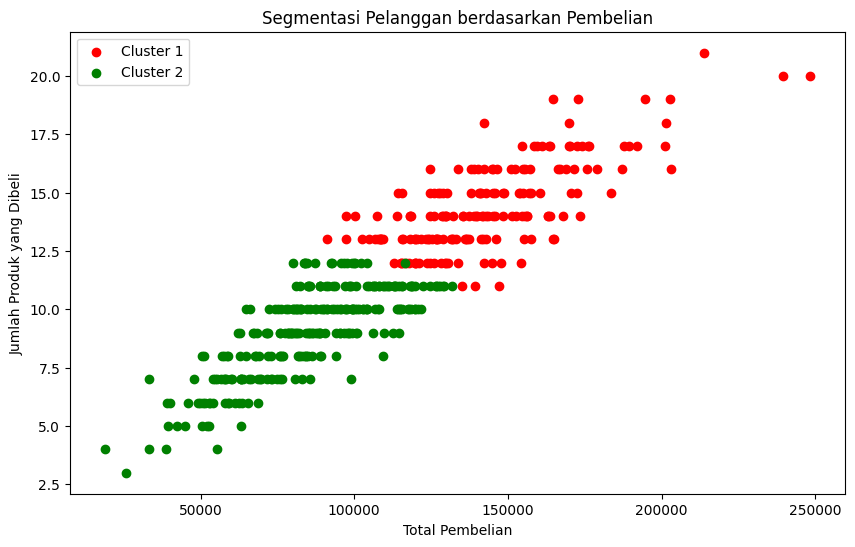

In [ ]:
# Visualisasi hasil klastering
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']

for i in range(n_clusters):
    cluster_data = df_customer_purchase[df_customer_purchase["Cluster"] == i]
    plt.scatter(cluster_data["TotalPurchase"], cluster_data["TotalProducts"], color=colors[i], label=f"Cluster {i+1}")

plt.xlabel("Total Pembelian")
plt.ylabel("Jumlah Produk yang Dibeli")
plt.title("Segmentasi Pelanggan berdasarkan Pembelian")
plt.legend()
plt.show()

## **6. Melihat Akurasi**

In [ ]:
# Menghitung metrik evaluasi
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(df_customer_purchase_scaled, df_customer_purchase["Cluster"])
davies_bouldin_idx = davies_bouldin_score(df_customer_purchase_scaled, df_customer_purchase["Cluster"])
calinski_harabasz_idx = calinski_harabasz_score(df_customer_purchase_scaled, df_customer_purchase["Cluster"])

# Menampilkan hasil metrik evaluasi
print("Metrik Evaluasi untuk K-Means Clustering:")
print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Metrik Evaluasi untuk K-Means Clustering:
Inertia: 498.96281200958856
Silhouette Score: 0.5256871192950647
Davies-Bouldin Index: 0.6494197838981646
Calinski-Harabasz Index: 750.9708932948141


## **7. Hasil Akhir Clustering**

In [ ]:
print("Tabel Hasil Klastering Pelanggan:")
df_customer_purchase

## Jika ingin mengeksport hasil klastering ke dalam file CSV
#df_customer_purchase.to_csv("hasil_klastering_pelanggan.csv", index=False)

Tabel Hasil Klastering Pelanggan:


,CustomerID,TotalPurchase,TotalProducts,Frequency,Cluster
0,1,201000,17,17,0
1,2,91200,13,13,0
2,3,125800,15,15,0
3,4,64900,10,10,1
4,5,73400,7,7,1
...,...,...,...,...,...
442,443,145100,16,15,0
443,444,201300,18,18,0
444,445,169800,18,18,0
445,446,113700,11,11,1


---
# **TIME SERIES**

---

## **1. Data Cleaning**

### Mengubah Tipe Data

In [ ]:
# Pembersihan data dan konversi tipe data
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%d/%m/%Y')
df_combined['Qty'] = pd.to_numeric(df_combined['Qty'], errors='coerce')
df_combined.dropna(subset=['Qty'], inplace=True)

Kolom 'Date' diubah menjadi format tipe data datetime agar dapat diolah dengan lebih mudah dalam konteks Time Series. Selain itu, kolom 'Qty' diubah menjadi tipe data numerik, dan data yang tidak valid atau hilang dihapuskan dari DataFrame. Langkah-langkah ini penting untuk memastikan data yang digunakan dalam prediksi Time Series bersih, konsisten, dan siap digunakan dalam penerapan model ARIMA agar menghasilkan prediksi yang lebih akurat.

### Agregasi Data

In [ ]:
# Agregasi data berdasarkan tanggal
df_agg = df_combined.groupby('Date')['Qty'].sum().reset_index()

## **2. Membuat Data Frame Terpisah**

### Group by Date and Qty

In [ ]:
# Membuat data frame baru yang berisi tanggal dan total quantity harian
data = pd.DataFrame({'Date': pd.date_range(start=df_agg['Date'].min(), periods=len(df_agg) + 0, freq='D')})
data = data.merge(df_agg, on='Date', how='left')
data['Qty'].fillna(0, inplace=True)  # Mengisi tanggal dengan total quantity harian 0 jika tidak ada data pada tanggal tersebut
data

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


### Data Train dan Test

In [ ]:
# Data train dan test split
train_size = int(len(data) * 0.8)  # 80% data untuk training, 20% data untuk testing
train, test = data[:train_size], data[train_size:]

## **3. Membuat Prediksi ARIMA**

In [ ]:
# Membuat fungsi untuk melakukan prediksi dengan ARIMA
def arima_predict(train, test):
    history = train['Qty'].tolist()
    predictions = []

    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))  # Order (p, d, q) diatur ke 5, 1, dan 0 sesuai dengan data
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test['Qty'].iloc[t]
        history.append(obs)

    return predictions

# Melakukan prediksi
predictions = arima_predict(train, test)
test['Predictions'] = predictions

<ipython-input-23-fc93b6ad1881>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


- Fungsi arima_predict(train, test) digunakan untuk memprediksi total quantity harian suatu produk berdasarkan data train dan test yang telah dipersiapkan sebelumnya.
- Model ARIMA yang dibuat menggunakan data train untuk melakukan fitting dan kemudian digunakan untuk memprediksi nilai satu langkah ke depan pada setiap iterasi melalui data test.
- Hasil prediksi tersebut disimpan dalam variabel predictions dan ditambahkan ke dalam DataFrame test sebagai kolom baru yang disebut 'Predictions'. Hasil prediksi ini dapat memberikan gambaran tentang performa model dan akurasinya dalam memprediksi data aktual, yang berguna dalam pengambilan keputusan bisnis dan perencanaan ke depan.


Noted : Namun, untuk meningkatkan performa prediksi, perlu dipertimbangkan berbagai pendekatan prediksi lainnya serta tuning parameter model ARIMA.

## **4. Visualisasi Line Chart (Plotly)**

In [ ]:
# Visualisasi line chart dengan Plotly
fig = go.Figure()

# Data aktual
fig.add_trace(go.Scatter(x=data['Date'], y=data['Qty'], mode='lines', name='Actual', line=dict(color='blue')))

# Data prediksi
fig.add_trace(go.Scatter(x=test['Date'], y=test['Predictions'], mode='lines', name='Predicted', line=dict(color='orange')))

# Konfigurasi tampilan hover
fig.update_layout(hovermode='x',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  hoverlabel_align='left',
                  hoverlabel_namelength=0)

# Menampilkan nilai angka saat mouse diarahkan ke titik garis
fig.update_traces(hovertemplate='Date: %{x}<br>Qty: %{y:.2f}', selector=dict(type='scatter'))

# Mengatur batas awal tampilan chart
fig.update_layout(xaxis=dict(range=[data['Date'].min(), data['Date'].max()]))

# Menampilkan chart
fig.show()

## **5. Matriks Evaluasi**

In [ ]:
# Menghitung nilai prediksi
predictions = arima_predict(train, test)
test['Predictions'] = predictions

# Menghitung metrik evaluasi
mae = mean_absolute_error(test['Qty'], test['Predictions'])
mse = mean_squared_error(test['Qty'], test['Predictions'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Qty'] - test['Predictions']) / test['Qty'])) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 13.18648138590819
Mean Squared Error (MSE): 240.7976667776563
Root Mean Squared Error (RMSE): 15.517656613601691
Mean Absolute Percentage Error (MAPE): 30.362989859091023


<ipython-input-25-362da8142221>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Interpretasi** :

1. Nilai MAE sebesar 13.19 berada dalam kisaran "Sedang" berdasarkan panduan umum. Ini menunjukkan bahwa rata-rata selisih absolut antara nilai prediksi dan nilai aktual adalah sekitar 13.19 unit. Meskipun tidak berada pada tingkat rendah seperti diharapkan, nilai ini masih dapat diterima tergantung pada konteks aplikasi dan persyaratan prediksi yang diinginkan.

2. Nilai MSE sebesar 240.80 berada dalam kisaran "Sedang" berdasarkan panduan umum. Ini menunjukkan bahwa rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual adalah sekitar 240.80 unit^2. Meskipun masih ada varians yang cukup besar dalam prediksi, hasil ini mungkin dapat diterima tergantung pada kasus penggunaan.

3. Nilai RMSE sebesar 15.52 juga berada dalam kisaran "Sedang" berdasarkan panduan umum. Ini adalah akar dari MSE dan memberikan perubahan skala yang lebih mudah diinterpretasikan. Nilai RMSE ini sebanding dengan MAE, dan menunjukkan adanya variasi dalam prediksi namun masih cukup dapat diterima.

4. Nilai MAPE sebesar 30.36% berada dalam kisaran "Sedang" berdasarkan panduan umum. MAPE ini mengukur rata-rata persentase kesalahan antara nilai prediksi dan nilai aktual. Nilai 30.36% menunjukkan bahwa rata-rata kesalahan prediksi sekitar 30.36% dari nilai aktual.

Secara keseluruhan, hasil metrik evaluasi menunjukkan bahwa model ARIMA yang telah dibuat memberikan prediksi yang relatif baik, tetapi masih memiliki tingkat kesalahan yang signifikan. Hasil ini menunjukkan bahwa model tersebut memiliki keterbatasan dan masih ada ruang untuk perbaikan.

## **6. Data Frame Hasil Prediksi Time Series**

In [ ]:
# Menampilkan dataframe prediksi
print(test[['Date', 'Qty', 'Predictions']])

          Date  Qty  Predictions
292 2022-10-20   39    40.345630
293 2022-10-21   35    40.402755
294 2022-10-22   56    38.925133
295 2022-10-23   59    43.421026
296 2022-10-24   39    44.574411
..         ...  ...          ...
360 2022-12-27   70    46.323333
361 2022-12-28   68    50.201878
362 2022-12-29   42    52.191769
363 2022-12-30   44    56.889042
364 2022-12-31   37    55.343254

[73 rows x 3 columns]
